
**Dataset:**

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download






## EDA

Features:

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix, r2_score,mean_absolute_error
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 10

# Change how many rows of output you see
pd.set_option('display.max_rows', 100)

## Read and Examine Data

In [3]:
strokedata=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
strokedata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#unique identifier does not matter, remove it.

strokedata.pop('id')

0        9046
1       51676
2       31112
3       60182
4        1665
        ...  
5105    18234
5106    44873
5107    19723
5108    37544
5109    44679
Name: id, Length: 5110, dtype: int64

In [6]:
strokedata.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
#make residence type lower case
strokedata.columns=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']

In [8]:
strokedata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
strokedata.info()
#bmi has nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [10]:
strokedata.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [11]:
posstroke=strokedata[strokedata['stroke']==1]
posstroke.info()
#40 null BMI values in the stroke category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             249 non-null    object 
 1   age                249 non-null    float64
 2   hypertension       249 non-null    int64  
 3   heart_disease      249 non-null    int64  
 4   ever_married       249 non-null    object 
 5   work_type          249 non-null    object 
 6   residence_type     249 non-null    object 
 7   avg_glucose_level  249 non-null    float64
 8   bmi                209 non-null    float64
 9   smoking_status     249 non-null    object 
 10  stroke             249 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 23.3+ KB


In [12]:
strokedata.smoking_status.value_counts()
#1544 unknown values

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [13]:
posstroke.smoking_status.value_counts()
#of positive stroke, 47 unknown smoking status 

never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: smoking_status, dtype: int64

In [14]:
strokedata.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:ylabel='smoking_status'>

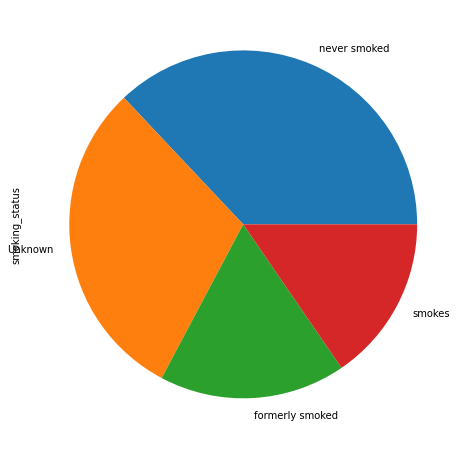

In [15]:
plt.figure(figsize = (10,8))
strokedata.smoking_status.value_counts().plot(kind='pie')

#the amount of unknown is too large to get rid of the data, since categorical, values cannot be replaced, will make unknown its own categotu

In [16]:
strokedata.isnull().sum()
#BMI has 201 missing values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

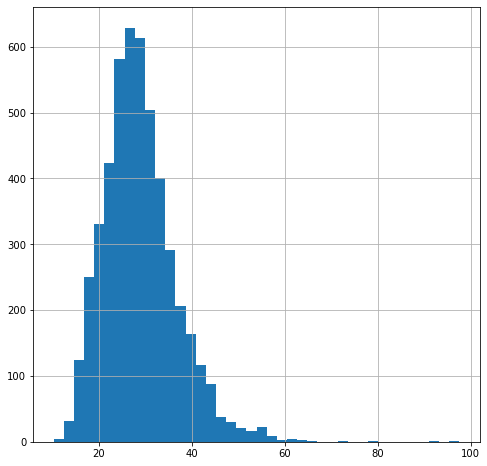

In [17]:
strokedata.bmi.hist(bins=40)
#this data is nearly normal, slightly positively skewed. Mode may be more appropriate than mean 

In [18]:
print (strokedata.bmi.mean())
print (strokedata.bmi.mode())

bmi_mean=strokedata.bmi.mean()

#both values are similar, will use fillna in strokeclean dataset

28.893236911794673
0    28.7
dtype: float64


In [19]:
strokedata.nunique()
#all binary classifiers (hypertension, heart disease, ever married, residence type, and stroke) have 2 values 
#exception: gender has 3 values

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [20]:
strokedata.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:ylabel='work_type'>

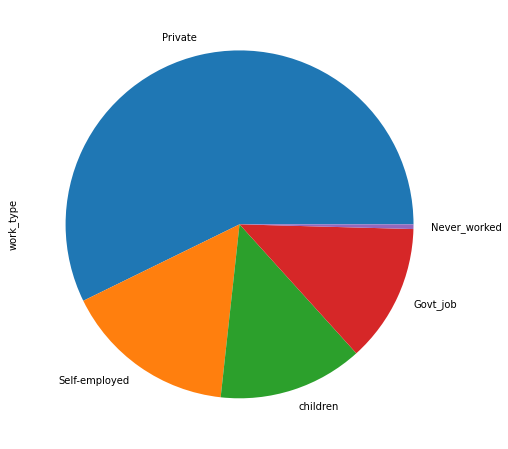

In [21]:
plt.figure(figsize = (10,8))
strokedata.work_type.value_counts().plot(kind='pie') 

In [22]:
strokedata.ever_married.value_counts()
#since this is a binary classifier, will replace with boolean variable, 1 being 'yes', 0 being 'no'

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [23]:
strokedata.residence_type.value_counts()
#binary classifier, boolean variable 

Urban    2596
Rural    2514
Name: residence_type, dtype: int64

In [24]:
strokedata.gender.value_counts()
# one 'other'

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [25]:
#replace binary classifiers with booleans
strokedata.gender.replace({'Male':1,'Female':0},inplace = True)
strokedata.ever_married.replace({'Yes':1,'No':0},inplace = True)
strokedata.residence_type.replace({'Urban':1,'Rural':0},inplace = True)

In [26]:
strokedata.gender.value_counts()

0        2994
1        2115
Other       1
Name: gender, dtype: int64

In [27]:
#drop rows with 'other' as value in gender column so that gender is binary classifier and can be replaced with boolean

strokeclean = strokedata[strokedata.gender != 'Other']

In [28]:
#check that value was dropped

strokeclean.gender

0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    1
5109    0
Name: gender, Length: 5109, dtype: object

In [29]:
#make sure no other data was lost

strokeclean.shape

(5109, 11)

In [30]:
strokeclean

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Private,1,83.75,NaN,never smoked,0
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [31]:
#replace null values of bmi with mean 
strokeclean.fillna(value=bmi_mean, axis=1, inplace=True)


/Users/abigailworkmeister/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [32]:
strokeclean

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0
5108,1,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0


In [33]:
strokeclean.bmi.isnull().sum()

0

In [34]:
strokeclean

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0
5108,1,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0


In [35]:
strokeclean.age.value_counts()
#ages below 2 are not whole numbers, round

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [36]:
#round all ages to whole numbers since only babies include decimals
strokeclean.age=strokeclean.age.round()

/Users/abigailworkmeister/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
strokeclean.age.value_counts()

78.0    102
57.0     95
2.0      90
52.0     90
54.0     87
51.0     86
53.0     85
79.0     85
45.0     85
55.0     83
50.0     83
59.0     80
31.0     79
49.0     79
56.0     77
61.0     76
37.0     76
47.0     75
44.0     75
40.0     74
62.0     74
63.0     74
41.0     73
60.0     72
38.0     72
39.0     71
32.0     71
42.0     71
43.0     70
80.0     70
34.0     68
58.0     68
48.0     66
1.0      65
5.0      65
23.0     64
65.0     62
46.0     62
26.0     61
71.0     61
17.0     60
66.0     60
18.0     60
81.0     60
20.0     59
8.0      58
13.0     57
25.0     57
33.0     57
82.0     56
27.0     55
30.0     55
24.0     55
35.0     54
14.0     54
69.0     54
28.0     54
75.0     53
64.0     53
16.0     52
36.0     52
29.0     51
19.0     50
76.0     50
67.0     49
21.0     47
68.0     47
3.0      46
73.0     46
22.0     45
70.0     45
12.0     45
15.0     45
72.0     45
77.0     42
74.0     40
9.0      38
11.0     36
10.0     35
4.0      34
7.0      32
6.0      24
0.0      20
Name

In [38]:
strokeclean

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0
5108,1,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'ever_married'}>,
        <AxesSubplot:title={'center':'residence_type'}>],
       [<AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

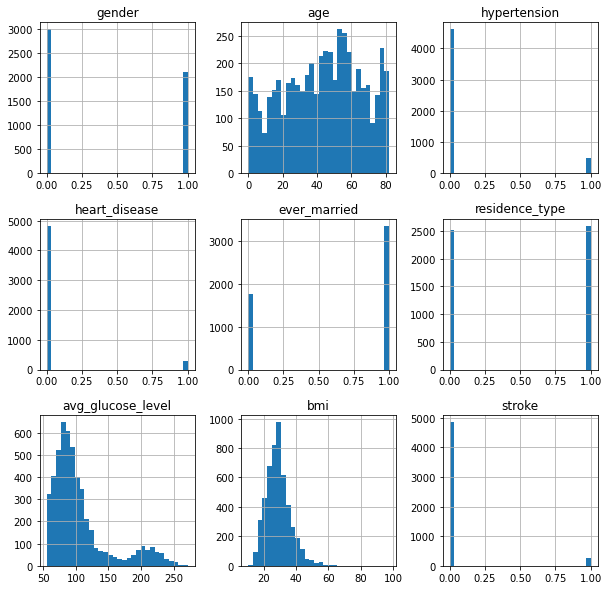

In [39]:
strokeclean.hist(figsize=[10,10], bins=30)

#age is negatively skewed
#avg glucose level is positively skewed (skewed left)
#bmi is positively skewed

#hypertension, heart disease, and stroke mostly have 0's, class bias 

<AxesSubplot:>

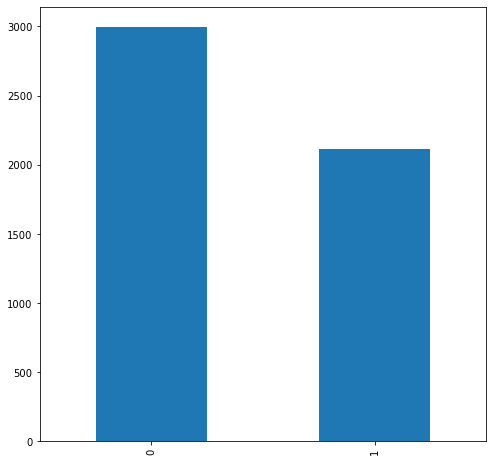

In [40]:
strokeclean.gender.value_counts().plot(kind = 'bar')

<AxesSubplot:>

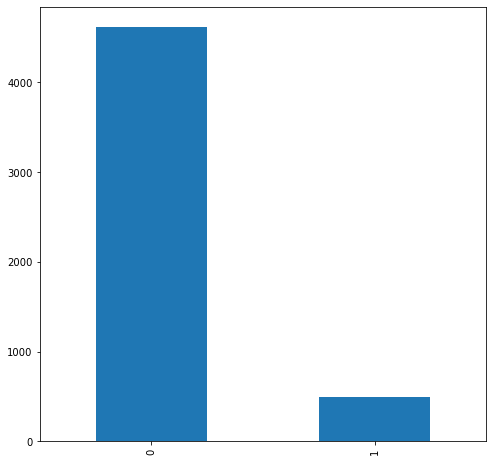

In [41]:
strokeclean.hypertension.value_counts().plot(kind = 'bar')

#class imbalance

<AxesSubplot:>

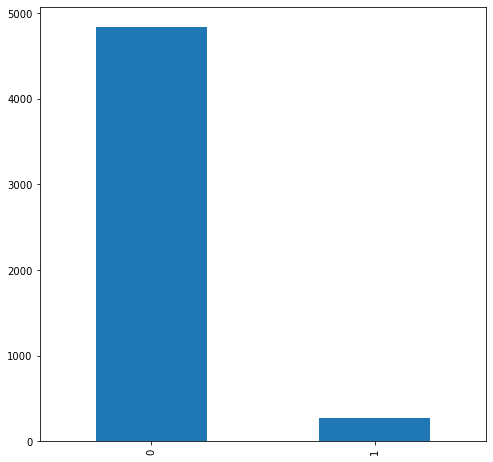

In [42]:
strokeclean.heart_disease.value_counts().plot(kind = 'bar')

#class imbalance

<AxesSubplot:>

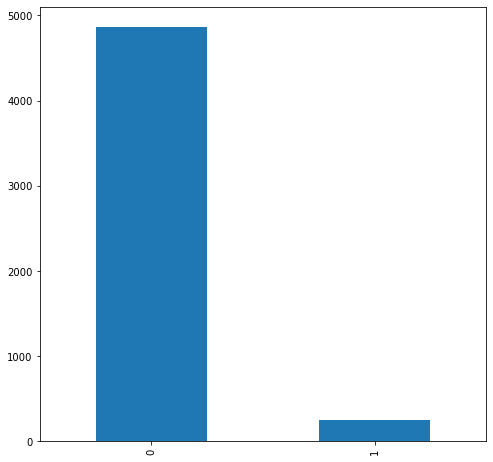

In [43]:
strokeclean.stroke.value_counts().plot(kind = 'bar')

#class imbalance in target, will cause issues down the road

<AxesSubplot:>

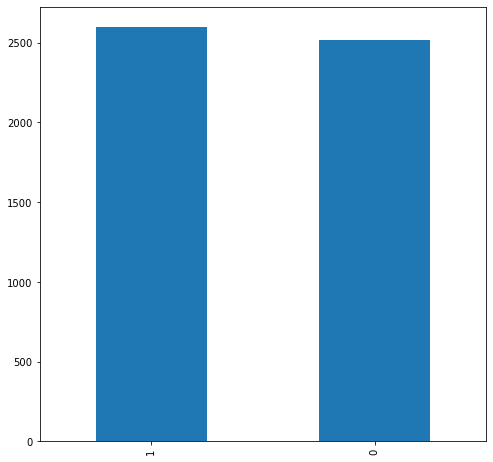

In [44]:
strokeclean.residence_type.value_counts().plot(kind = 'bar')

<AxesSubplot:>

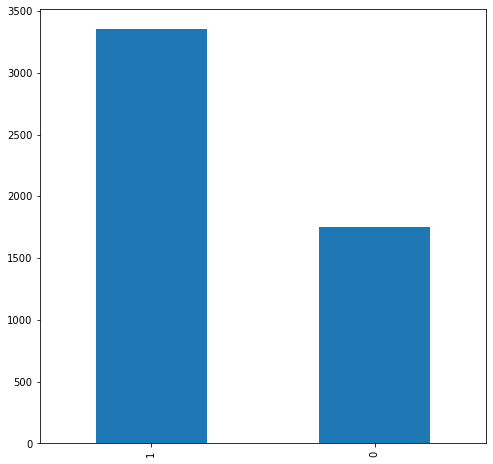

In [45]:
strokeclean.ever_married.value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='Frequency'>

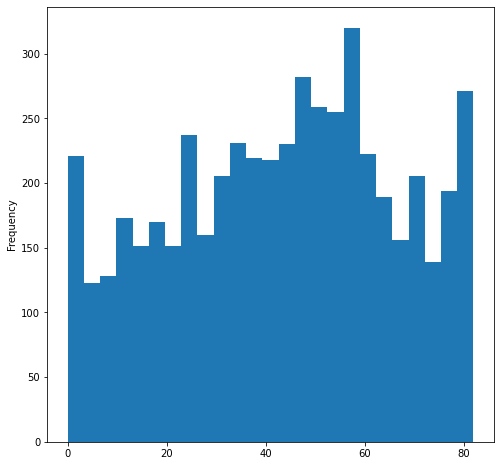

In [46]:
strokeclean.age.plot(kind = 'hist', bins=25)

<AxesSubplot:ylabel='Frequency'>

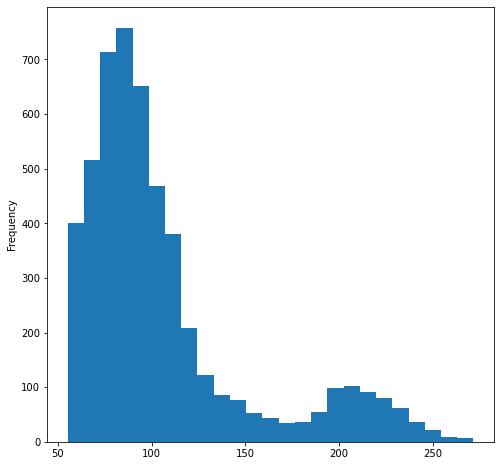

In [47]:
strokeclean.avg_glucose_level.plot(kind = 'hist', bins=25)

<AxesSubplot:ylabel='Frequency'>

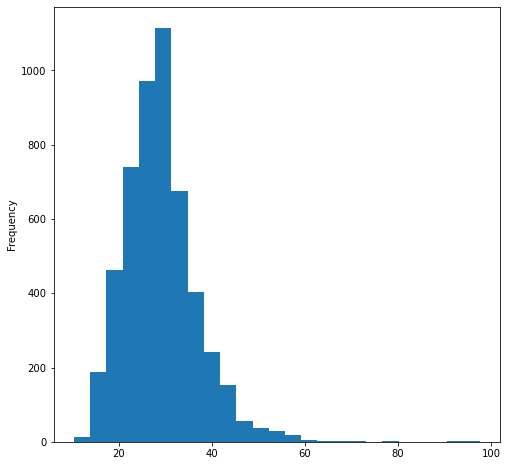

In [48]:
strokeclean.bmi.plot(kind = 'hist', bins=25)

<AxesSubplot:>

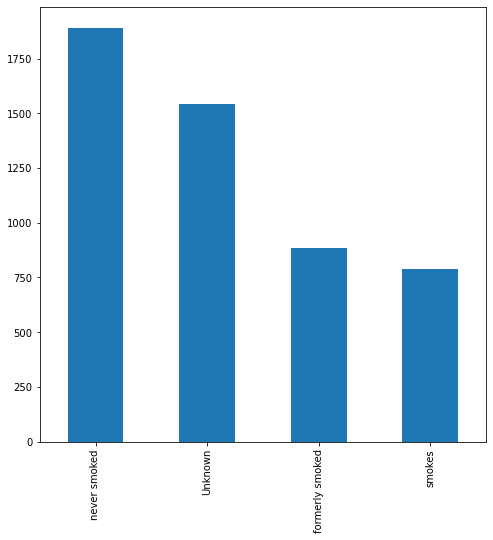

In [49]:
strokeclean.smoking_status.value_counts().plot(kind = 'bar')

<AxesSubplot:>

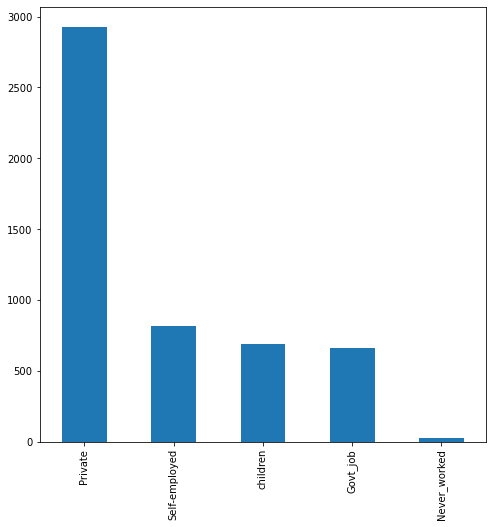

In [50]:
strokeclean.work_type.value_counts().plot(kind = 'bar')


In [51]:
strokeclean.corr()

,gender,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,stroke
gender,1.000000,-0.027688,0.021223,0.085685,-0.030171,-0.006105,0.054722,-0.025606,0.009081
age,-0.027688,1.000000,0.276366,0.263776,0.679082,0.014059,0.238331,0.325859,0.245225
hypertension,0.021223,0.276366,1.000000,0.108292,0.164187,-0.007980,0.174540,0.160147,0.127891
heart_disease,0.085685,0.263776,0.108292,1.000000,0.114601,0.003045,0.161907,0.038862,0.134905
ever_married,-0.030171,0.679082,0.164187,0.114601,1.000000,0.005988,0.155329,0.335563,0.108299
residence_type,-0.006105,0.014059,-0.007980,0.003045,0.005988,1.000000,-0.004783,-0.000288,0.015415
avg_glucose_level,0.054722,0.238331,0.174540,0.161907,0.155329,-0.004783,1.000000,0.168910,0.131991
bmi,-0.025606,0.325859,0.160147,0.038862,0.335563,-0.000288,0.168910,1.000000,0.038912
stroke,0.009081,0.245225,0.127891,0.134905,0.108299,0.015415,0.131991,0.038912,1.000000


<AxesSubplot:>

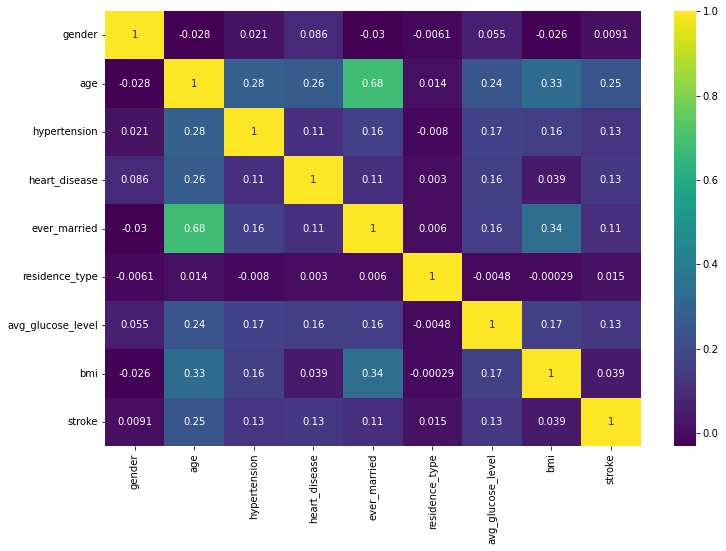

In [52]:
plt.figure(figsize = (12,8))
sns.heatmap(data=strokeclean.corr(), annot=True, cmap="viridis")

In [53]:
#Replace categorical data (work type and smoking status) with dummy variables in a new dataframe 

strokedummy=pd.get_dummies(strokeclean, columns=['work_type', 'smoking_status'],drop_first=True, dtype=int,)

strokedummy

,gender,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.893237,0,0,1,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,1,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,1,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.600000,0,0,1,0,0,1,0,0


# Export file 

In [54]:
from pathlib import Path  
filepath = Path('exporteddata/out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)
strokedummy.to_csv(filepath, index=False)